In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

print(pd.__version__)

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')

# Convert dataset to pandas DataFrame
df = dataset['train'].to_pandas()

# Data Clean Up
# Change string to datetime ('job_posted_date' column)
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Convert 'job_skills' string list to a python list
import ast
df['job_skills'] = df['job_skills'].apply(lambda string_list: ast.literal_eval(string_list) if pd.notna(string_list) else string_list)


2.2.3


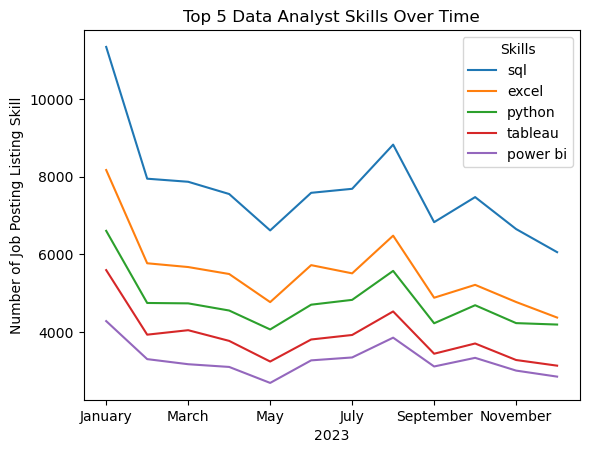

In [2]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

df_DA_exploded = df_DA.explode('job_skills')

df_DA_pivot = df_DA_exploded.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_DA_pivot.reset_index(inplace=True)

df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%B'))

df_DA_pivot.drop(columns='job_posted_month_no', inplace=True)

df_DA_pivot.set_index('job_posted_month', inplace=True)

top_skills = df_DA_exploded['job_skills'].value_counts().head(10).index.to_list()

df_pivot_top_skills = df_DA_pivot[top_skills]

df_pivot_top_skills.iloc[:, 0:5].plot(kind='line')
plt.title('Top 5 Data Analyst Skills Over Time')
plt.xlabel('2023')
plt.ylabel('Number of Job Posting Listing Skill')
plt.legend(title='Skills', loc='upper right')
plt.show()



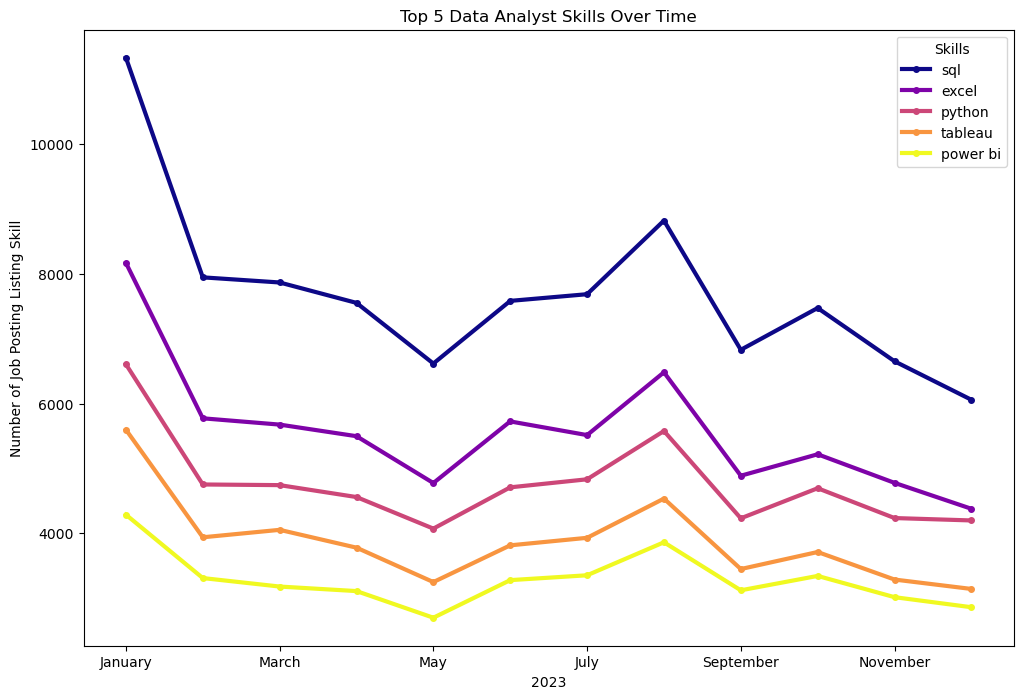

In [3]:
df_pivot_top_skills.iloc[:,0:5].plot(
    kind='line',
    linewidth=3, 
    linestyle='-', #options: '--' ':' '-.'
    colormap= 'plasma', #options: 'plasma', 'inferno', 'magma', 'cividis', 'coolwarm', 'bwr', etc.
    marker='o', #options: 'o', 's', '^', 'D', 'x', etc.
    markersize=4,
    figsize=(12,8)
)

plt.title('Top 5 Data Analyst Skills Over Time')
plt.xlabel('2023')
plt.ylabel('Number of Job Posting Listing Skill')
plt.legend(title='Skills', loc='upper right')
plt.show()

<Figure size 1000x600 with 0 Axes>

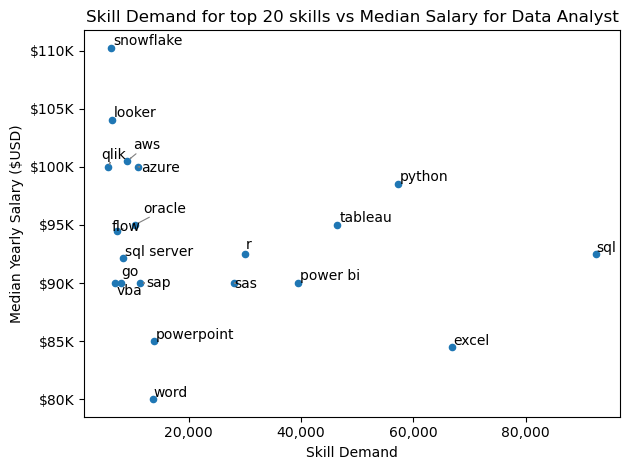

In [26]:
df_count_median = df_DA_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
)

skill_num = 20
df_count_median.sort_values(by='skill_count', ascending=False, inplace=True)
plt.figure(figsize=(10, 6))
df_count_median = df_count_median.head(skill_num)

df_count_median.plot(kind='scatter', x='skill_count', y='median_salary')
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x):,}'))


plt.xlabel('Skill Demand')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title(f'Skill Demand for top {skill_num} skills vs Median Salary for Data Analyst')
plt.tight_layout()

texts = []
for i, row in enumerate(df_count_median.index):
    texts.append(plt.text(df_count_median['skill_count'].iloc[i], df_count_median['median_salary'].iloc[i], row))

from adjustText import adjust_text
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.8))

plt.show() 
